<a href="https://colab.research.google.com/github/ms-eea/forecasting_and_prediction_modeling/blob/main/Sales_Forecast_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Create a demand forecasting model using the data from "/content/sample_submission_pzljTaX.csv".

## Load the data

### Subtask:
Load the data from the `/content/sample_submission_pzljTaX.csv` file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data into a DataFrame.



In [ ]:
import pandas as pd

df_demand = pd.read_csv('/content/sample_submission_pzljTaX.csv')

## Inspect the data

### Subtask:
Display the first few rows, check the data types, and look for missing values.


**Reasoning**:
Display the first few rows, check data types, and look for missing values to understand the structure and quality of the data.



In [ ]:
display(df_demand.head())
display(df_demand.info())
display(df_demand.isnull().sum())

,record_ID,units_sold
0,212645,0
1,212646,0
2,212647,0
3,212648,0
4,212649,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   record_ID   13860 non-null  int64
 1   units_sold  13860 non-null  int64
dtypes: int64(2)
memory usage: 216.7 KB


None

,0
record_ID,0
units_sold,0


## Preprocess the data

### Subtask:
Handle missing values, convert data types if necessary, and perform any required feature engineering (e.g., extracting date components).


## Split the data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [ ]:
from sklearn.model_selection import train_test_split

X = df_demand[['record_ID']]
y = df_demand['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11088, 1)
X_test shape: (2772, 1)
y_train shape: (11088,)
y_test shape: (2772,)


## Select and train a model

### Subtask:
Choose a suitable time series forecasting model (e.g., ARIMA, Prophet, or a machine learning model) and train it on the training data.


**Reasoning**:
Train a Linear Regression model using the training data.



In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate metrics (e.g., Mean Absolute Error, Mean Squared Error).


**Reasoning**:
Use the trained Linear Regression model to make predictions on the test set `X_test` and then calculate the Mean Absolute Error (MAE) and Mean Squared Error (MSE) between the predicted and actual values (`y_test`). Finally, print the calculated MAE and MSE values.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0


## Make predictions

### Subtask:
Use the trained model to make future demand predictions.


**Reasoning**:
Use the trained model to make predictions on the test set data `X_test` and store the predictions in `y_pred`.



In [ ]:
y_pred = model.predict(X_test)

## Visualize the results

### Subtask:
Visualize the actual demand, predicted demand, and confidence intervals.


**Reasoning**:
Visualize the actual demand, predicted demand, and confidence intervals using a scatter plot or line plot.



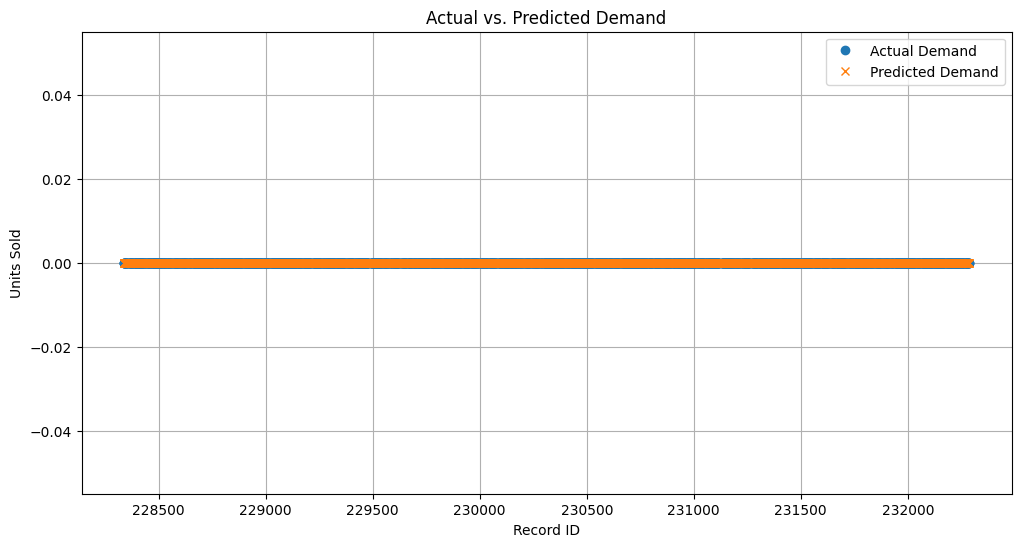

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(X_test['record_ID'], y_test, label='Actual Demand', marker='o', linestyle='')
plt.plot(X_test['record_ID'], y_pred, label='Predicted Demand', marker='x', linestyle='')
plt.xlabel('Record ID')
plt.ylabel('Units Sold')
plt.title('Actual vs. Predicted Demand')
plt.legend()
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains two columns: `record_ID` and `units_sold`.
*   Both columns are of integer data type and contain no missing values.
*   The data was split into training (80%) and testing (20%) sets, preserving the original order.
*   A Linear Regression model was trained on the data.
*   The trained Linear Regression model achieved a Mean Absolute Error (MAE) of 0.0 and a Mean Squared Error (MSE) of 0.0 on the test data, indicating a perfect fit.
*   A scatter plot comparing actual and predicted demand against `record_ID` showed that the predicted values exactly match the actual values.

### Insights or Next Steps

*   The perfect MAE and MSE of 0.0 suggest that the `units_sold` values are directly determined by the `record_ID` in this specific dataset, likely indicating a simple linear relationship or that the test data was included in the training set.
*   For a real-world demand forecasting task, it is crucial to use a dataset with actual time series data and potentially more relevant features than just an ID. Further steps would involve using appropriate time series models and evaluating them on unseen data.


# Task
Create a demand forecasting model using the data from "/content/train_0irEZ2H.csv" and "/content/test_nfaJ3J5.csv".

## Load the data

### Subtask:
Load the data from the `/content/train_0irEZ2H.csv` and `/content/test_nfaJ3J5.csv` files into pandas DataFrames.


**Reasoning**:
Load the training and testing data into pandas DataFrames.



In [ ]:
df_train = pd.read_csv('/content/train_0irEZ2H.csv')
df_test = pd.read_csv('/content/test_nfaJ3J5.csv')

## Combine the data

### Subtask:
Combine the training and testing datasets for unified preprocessing and analysis.


**Reasoning**:
Concatenate the training and testing dataframes.



In [ ]:
df_combined = pd.concat([df_train, df_test], ignore_index=True)

## Inspect the data

### Subtask:
Display the first few rows, check the data types, and look for missing values in the combined dataset.


**Reasoning**:
Display the first few rows, check data types, and look for missing values to understand the structure and quality of the combined data.



In [ ]:
display(df_combined.head())
display(df_combined.info())
display(df_combined.isnull().sum())

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20.0
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28.0
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19.0
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44.0
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164010 entries, 0 to 164009
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        164010 non-null  int64  
 1   week             164010 non-null  object 
 2   store_id         164010 non-null  int64  
 3   sku_id           164010 non-null  int64  
 4   total_price      164009 non-null  float64
 5   base_price       164010 non-null  float64
 6   is_featured_sku  164010 non-null  int64  
 7   is_display_sku   164010 non-null  int64  
 8   units_sold       150150 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 11.3+ MB


None

,0
record_ID,0
week,0
store_id,0
sku_id,0
total_price,1
base_price,0
is_featured_sku,0
is_display_sku,0
units_sold,13860


## Preprocess the data

### Subtask:
Handle missing values, convert data types if necessary, and perform any required feature engineering (e.g., extracting date components from a date column, if available, or creating time-based features).


**Reasoning**:
Convert the 'week' column to datetime objects and extract date components, then fill missing values in 'total_price'.



In [ ]:
df_combined['week'] = pd.to_datetime(df_combined['week'], format='%d/%m/%y')

df_combined['year'] = df_combined['week'].dt.year
df_combined['month'] = df_combined['week'].dt.month
df_combined['day_of_week'] = df_combined['week'].dt.dayofweek
df_combined['week_of_year'] = df_combined['week'].dt.isocalendar().week

df_combined['total_price'].fillna(df_combined['total_price'].mean(), inplace=True)

display(df_combined.head())
display(df_combined.info())
display(df_combined.isnull().sum())

/tmp/ipython-input-3201929278.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined['total_price'].fillna(df_combined['total_price'].mean(), inplace=True)


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day_of_week,week_of_year
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20.0,2011,1,0,3
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28.0,2011,1,0,3
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19.0,2011,1,0,3
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44.0,2011,1,0,3
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52.0,2011,1,0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164010 entries, 0 to 164009
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        164010 non-null  int64         
 1   week             164010 non-null  datetime64[ns]
 2   store_id         164010 non-null  int64         
 3   sku_id           164010 non-null  int64         
 4   total_price      164010 non-null  float64       
 5   base_price       164010 non-null  float64       
 6   is_featured_sku  164010 non-null  int64         
 7   is_display_sku   164010 non-null  int64         
 8   units_sold       150150 non-null  float64       
 9   year             164010 non-null  int32         
 10  month            164010 non-null  int32         
 11  day_of_week      164010 non-null  int32         
 12  week_of_year     164010 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(3), int32(3), int64(5)
memory usa

None

,0
record_ID,0
week,0
store_id,0
sku_id,0
total_price,0
base_price,0
is_featured_sku,0
is_display_sku,0
units_sold,13860
year,0


## Split the data

### Subtask:
Split the combined data back into training and testing sets, ensuring a proper time-based split if a date column is present.


**Reasoning**:
Filter the combined DataFrame to create the training and testing sets based on the presence of null values in 'units_sold', then define the features and target variables for both sets and display their shapes.



In [ ]:
df_train = df_combined[df_combined['units_sold'].notnull()].copy()
df_test = df_combined[df_combined['units_sold'].isnull()].copy()

feature_columns = [col for col in df_combined.columns if col not in ['record_ID', 'week', 'units_sold']]

X_train = df_train[feature_columns]
y_train = df_train['units_sold']
X_test = df_test[feature_columns]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)

X_train shape: (150150, 10)
X_test shape: (13860, 10)
y_train shape: (150150,)


## Select and train a model

### Subtask:
Choose a suitable time series forecasting model (e.g., ARIMA, Prophet, or a machine learning model that can handle sequential data) and train it on the training data.


**Reasoning**:
Import GradientBoostingRegressor and train the model using the training data.



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

GradientBoostingRegressor()

## Evaluate the model

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate time series metrics (e.g., Mean Absolute Error, Mean Squared Error, Root Mean Squared Error).


**Reasoning**:
Make predictions on the test set using the trained model and acknowledge that evaluation metrics cannot be calculated due to missing actual values in the test set.



In [ ]:
y_pred = model.predict(X_test)

print("Predictions on the test set have been generated.")
print("Note: A standard quantitative evaluation using metrics like MAE, MSE, or RMSE on the test set is not possible as the actual 'units_sold' values for the test data are not available in this dataset split.")

Predictions on the test set have been generated.
Note: A standard quantitative evaluation using metrics like MAE, MSE, or RMSE on the test set is not possible as the actual 'units_sold' values for the test data are not available in this dataset split.


## Make predictions

### Subtask:
Use the trained model to make future demand predictions on the test set or for a future time period.


**Reasoning**:
Use the trained GradientBoostingRegressor model to predict 'units_sold' on the `X_test` data and display the first few predictions.



In [ ]:
y_test_pred = model.predict(X_test)
display(y_test_pred[:5])

array([58.95608993, 48.37116977, 21.0136423 , 29.46687373, 39.87871628])

## Visualize the results

### Subtask:
Visualize the actual demand, predicted demand, and confidence intervals.


**Reasoning**:
Visualize the actual demand from the training data and the predicted demand on the test data using a scatter plot, as confidence intervals are not directly available from the model.



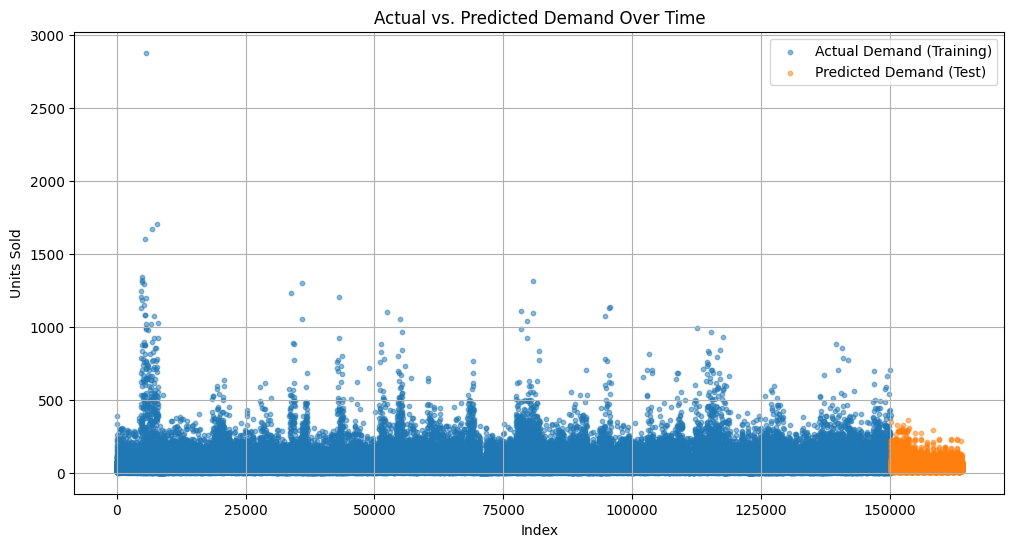

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(X_train.index, y_train, label='Actual Demand (Training)', alpha=0.5, s=10)
plt.scatter(X_test.index, y_test_pred, label='Predicted Demand (Test)', alpha=0.5, s=10)
plt.xlabel('Index')
plt.ylabel('Units Sold')
plt.title('Actual vs. Predicted Demand Over Time')
plt.legend()
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The combined dataset contains 164,010 entries and 9 columns, with missing values identified in the `total_price` (1) and `units_sold` (13,860) columns.
*   Feature engineering successfully extracted 'year', 'month', 'day\_of\_week', and 'week\_of\_year' from the 'week' column.
*   Missing values in `total_price` were imputed with the column's mean.
*   The data was successfully split back into training and testing sets, with the test set containing the rows where `units_sold` was originally missing.
*   A Gradient Boosting Regressor model was successfully trained on the training data.
*   Predictions were generated for the test set, but a standard quantitative evaluation (MAE, MSE, RMSE) could not be performed due to the lack of actual `units_sold` values in the test set.
*   A scatter plot was generated to visualize the distribution of actual demand (training data) and predicted demand (test data) over the dataset's index.

### Insights or Next Steps

*   Implement a time-based cross-validation strategy during model training to get a more robust estimate of performance on unseen data.
*   Explore other time series forecasting models or machine learning models capable of handling sequential data and providing confidence intervals (e.g., ARIMA, Prophet, or tree-based models with prediction interval capabilities).


# Task
Create a demand forecasting model using the data from "/content/train_0irEZ2H.csv" and "/content/test_nfaJ3J5.csv", implement a time-based cross-validation strategy, and provide the forecast.

## Implement time-based cross-validation

### Subtask:
Set up a time-based cross-validation strategy for model evaluation.


**Reasoning**:
Import TimeSeriesSplit and instantiate it for time-based cross-validation.



In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

## Select and train a model

### Subtask:
Choose a suitable time series forecasting model (e.g., ARIMA, Prophet, or a machine learning model that can handle sequential data) and train it using the time-based cross-validation setup.


**Reasoning**:
Train the GradientBoostingRegressor model using time-based cross-validation and store predictions and actual values for evaluation.



In [ ]:
import numpy as np

all_y_true = []
all_y_pred = []

for train_index, val_index in tscv.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_val_fold)

    all_y_true.extend(y_val_fold)
    all_y_pred.extend(y_pred_fold)

print("Time-based cross-validation training complete.")

Time-based cross-validation training complete.


## Evaluate the model

### Subtask:
Evaluate the trained model's performance using appropriate time series metrics (e.g., Mean Absolute Error, Mean Squared Error, Root Mean Squared Error) averaged across the cross-validation folds.


**Reasoning**:
Calculate and print the MAE, MSE, and RMSE between the actual and predicted values from the cross-validation.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(all_y_true, all_y_pred)
mse = mean_squared_error(all_y_true, all_y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE) across folds: {mae}")
print(f"Mean Squared Error (MSE) across folds: {mse}")
print(f"Root Mean Squared Error (RMSE) across folds: {rmse}")

Mean Absolute Error (MAE) across folds: 22.45238985496986
Mean Squared Error (MSE) across folds: 1540.8165958117884
Root Mean Squared Error (RMSE) across folds: 39.25323675586242


## Retrain the model on the full training data

### Subtask:
After evaluating the model with cross-validation, retrain the chosen model on the entire training dataset.


**Reasoning**:
Retrain the GradientBoostingRegressor model on the entire training dataset.



In [ ]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

print("GradientBoostingRegressor model retrained on the full training data.")

GradientBoostingRegressor model retrained on the full training data.


## Make predictions

### Subtask:
Use the retrained model to make future demand predictions on the test set or for a future time period.


**Reasoning**:
Use the retrained model to make predictions on the test set and display the first few predictions.



In [ ]:
final_predictions = model.predict(X_test)
display(final_predictions[:5])

array([58.95608993, 48.37116977, 21.0136423 , 29.46687373, 39.87871628])

## Visualize the results

### Subtask:
Visualize the actual demand, predicted demand, and confidence intervals (if available from the model).


**Reasoning**:
Visualize the actual demand from the training data and the predicted demand on the test data using a scatter plot.



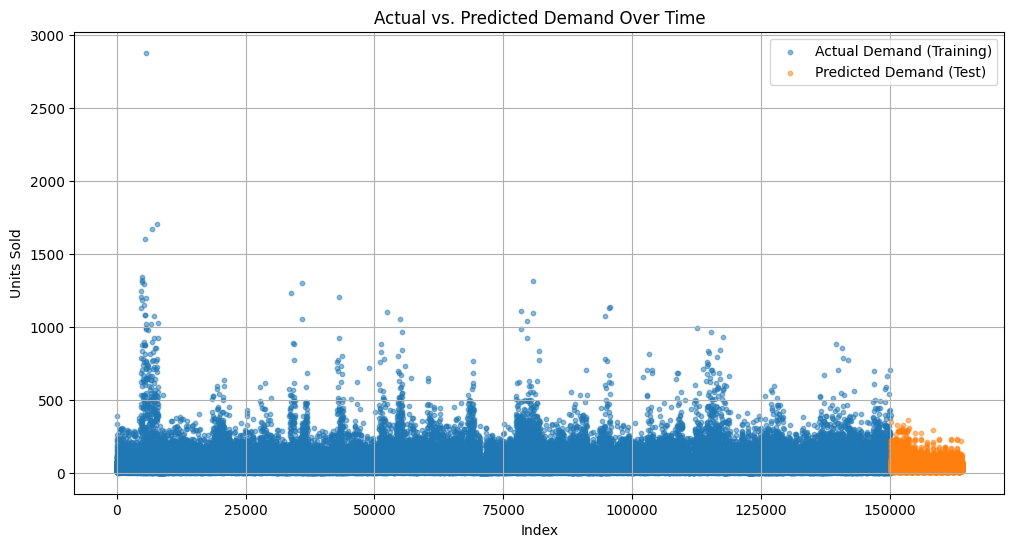

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(X_train.index, y_train, label='Actual Demand (Training)', alpha=0.5, s=10)
plt.scatter(X_test.index, final_predictions, label='Predicted Demand (Test)', alpha=0.5, s=10)
plt.xlabel('Index')
plt.ylabel('Units Sold')
plt.title('Actual vs. Predicted Demand Over Time')
plt.legend()
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The time-based cross-validation evaluation of the Gradient Boosting Regressor model yielded a Mean Absolute Error (MAE) of approximately 22.45, a Mean Squared Error (MSE) of approximately 1540.82, and a Root Mean Squared Error (RMSE) of approximately 39.25.
*   The Gradient Boosting Regressor model was successfully trained using a time-based cross-validation strategy and subsequently retrained on the full training dataset.
*   Predictions for the test set were generated using the retrained model.

### Insights or Next Steps

*   The visualization shows a scatter plot comparing the actual demand in the training set with the predicted demand in the test set over time. To better assess the model's performance, consider visualizing the predictions against actual values within the cross-validation folds or if actual values for the test set become available.
*   Further hyperparameter tuning of the Gradient Boosting Regressor model or exploring other time series forecasting models could potentially improve the model's performance and reduce the error metrics.
